In [28]:
import math
import random
import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np

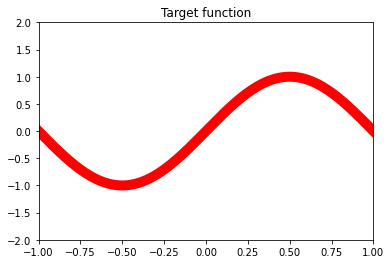

In [29]:
x_series = []
target_function = []
for i in range(-100,101):
  i = i / 100
  x_series.append(i)
  target_function.append(math.sin(math.pi*i))

plt.plot(x_series, target_function, linewidth=10, color="red")
plt.xlim([-1,1])
plt.ylim([-2,2])
plt.title("Target function")
plt.show()

def generate_samples(x_series, N):
  index_list = list(range(len(x_series)))
  kombos = list(permutations(index_list,2))
  samples = []
  for i in range(N):
    samples.append(random.choice(kombos))
  return samples

sample_indexes = generate_samples(x_series, 50)

def plot_curves(target_function, list_of_functions, average_function, titlo):
  plt.plot(x_series, target_function, linewidth=10, color="red")
  plt.plot(x_series, average_function, linewidth=10, color="blue")
  for curvo in list_of_functions:
    plt.plot(x_series, curvo, linewidth=0.5, color="grey")
  plt.xlim([-1,1])
  plt.ylim([-2,2])
  plt.title(titlo)
  plt.show()

In [30]:
##There are two hypotheses, h0 and h1
##There are 50 pairs of randomly selected indexes ((i00, i01), ...,(i490, i491))
##For each hypothesis and for each pair of randomly selected indexes, coefficients must be calculated

##First define how the coefficent for h0 must be calculated
def calc_coef_h0(index_pair):
  y1 = target_function[index_pair[0]]
  y2 = target_function[index_pair[1]]
  return (y1+y2) / 2

##then define how the two coefficients for h1 must be calculated
def calc_coefs_h1(index_pair):
  x1 = x_series[index_pair[0]]
  x2 = x_series[index_pair[1]]
  y1 = target_function[index_pair[0]]
  y2 = target_function[index_pair[1]]
  slope = (y2-y1) / (x2-x1)
  intercept = y1 - slope*x1
  return slope, intercept

##Calculate the coefficients for each index pair
coefs_h0 = []
coefs_h1 = []
for index_pair in sample_indexes:
  coefs_h0.append(calc_coef_h0(index_pair))
  coefs_h1.append(calc_coefs_h1(index_pair))

In [31]:
##For each hypothesis and for each index pair, y-values must be calculated
##The datastructure is a list of 50 curves that each contain 201 elements
functions_h0 = []
for coefo in coefs_h0:
  curvo = []
  for x in x_series:
    curvo.append(coefo)
  functions_h0.append(curvo)

functions_h1 = []
for coefo in coefs_h1:
  curvo = []
  for x in x_series:
    curvo.append(coefo[0]*x+coefo[1])
  functions_h1.append(curvo)

In [32]:
##For each hypothesis, the average function must be calculated. This is done by first calculating the average coefficients
avg_coef_h0 = sum(coefs_h0)/len(coefs_h0)
avg_slope_h1 = 0
avg_intercept_h1 = 0
for coefo in coefs_h1:
  avg_slope_h1 += (coefo[0]/len(coefs_h1))
  avg_intercept_h1 += (coefo[1]/len(coefs_h1))
##Then the y-values for the two average functions are calculated across the domain
avg_fun_h0 = []
avg_fun_h1 = []
for x in x_series:
  avg_fun_h0.append(avg_coef_h0)
  avg_fun_h1.append(avg_slope_h1*x+avg_intercept_h1)

In [33]:
##For each hypothesis, the bias must be calculated
##This is done by taking for each pair of datapoints
##- each datapoint is two x-values
##- for each x-value, find the prediction of the average function
##- add the prediction to the list of predictions for each hypothesis and keep it for later
##- find the error, i.e., the distance between the prediction and the target function for the value of x
##- multiply the error with itself
##- add to the total bias 
##Reference Abu-Mostafa p. 63
predictions_h0 = []
predictions_h1 = []
bias_h0 = 0
bias_h1 = 0
sample_x_values = []
for i in range(len(sample_indexes)):
  ##find the x-values
  index_1 = sample_indexes[i][0]
  index_2 = sample_indexes[i][1]
  x1 = x_series[index_1]
  x2 = x_series[index_2]
  ##find the true y-values for each x
  target_1 = target_function[index_1]
  target_2 = target_function[index_2]
  ##generate the prediction for each of the two x under h0
  pred_1_h0 = coefs_h0[i]
  pred_2_h0 = coefs_h0[i]
  predictions_h0.append(pred_1_h0)
  predictions_h1.append(pred_2_h0)
  ##Find the squared error for each prediction and add it to bias for h0
  bias_h0 += (target_1-pred_1_h0)**2
  bias_h0 += (target_2-pred_2_h0)**2
  ##generate the prediction for each of the two x under h1
  pred_1_h1 = coefs_h1[i][0]*x1+coefs_h1[i][1]
  pred_2_h1 = coefs_h1[i][0]*x2+coefs_h1[i][1]
  predictions_h1.append(pred_1_h1)
  predictions_h1.append(pred_2_h1)
  ##Find the squared error for each prediction and add it tot he bias for h1
  bias_h1 += (target_1-pred_1_h1)**2
  bias_h1 += (target_2-pred_2_h1)**2
bias_h0 = round(bias_h0,2)
bias_h1 = round(bias_h1,2)

In [34]:
##With reference to Abu-Mostafa p. 64
##Calculate the variance of the predictions for h0 and h1
##This is done the normal way for a list of data
def calculate_var(listo):
  avgo = sum(listo)/len(listo)
  varo = 0
  for x in listo:
    varo += (x - avgo)**2
  varo = round(varo, 5)
  return varo

var_h0 = calculate_var(predictions_h0)
var_h1 = calculate_var(predictions_h1)

Now displaying results for h0


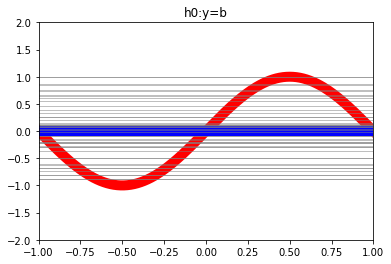

Bias for h0 is 22.74
Variance for h0 is 13.04924


In [35]:
print("Now displaying results for h0")
plot_curves(target_function, functions_h0, avg_fun_h0, "h0:y=b")
print("Bias for h0 is "+str(bias_h0))
print("Variance for h0 is "+str(var_h0))

Now displaying results for h1


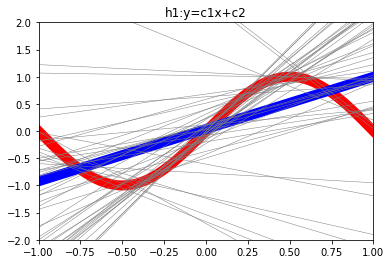

Bias for h1 is 0.0
Variance for h1 is 61.89198


In [36]:
print("Now displaying results for h1")
plot_curves(target_function, functions_h1, avg_fun_h1, "h1:y=c1x+c2")
print("Bias for h1 is "+str(bias_h1))
print("Variance for h1 is "+str(var_h1))